## GDP and Life Expectancy Correlation

### Project Goal:
#### Analyze the relation between GDP and life expectancy for six different countries.
### Data:
#### The data used in this analysis contains the GPD and Life Expectancy from 2000 up to 2015 for six countries: Chile, Germany, Mexico, United States, and Zimbabwe.

### Importing the dataset 

In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math
from scipy.stats import pearsonr
from tabulate import tabulate

df = pd.read_csv('all_data.csv')

### Taking a look at the data structure 

In [5]:
print('The data has a total of ' +str(len(df)) + ' records.')
print(df.head())

The data has a total of 96 records.
  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


### Checking countries' names on the data

In [7]:
print('The data contains the following countries ' + str(df.Country.unique())) 

The data contains the following countries ['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


### Checking the Years range

In [14]:
print('The data contains records from ' + str(df['Year'].min()) + ' up to ' + str(df['Year'].max()) +'.')


The data contains records from 2000 up to 2015.


### Analyzing how the GDP and Life Expectancy developed throughout the years

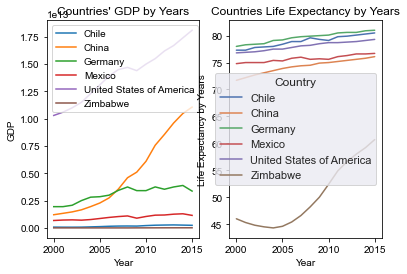

<Figure size 1080x576 with 0 Axes>

In [18]:
# GDP
color = sns.color_palette('tab10',10)
plt.subplot(1,2,1)
sns.lineplot(x = 'Year', y = 'GDP', hue ='Country', data = df) 
plt.title('''Countries' GDP by Years''')
plt.legend(loc=2)

# Life Expectancy
plt.subplot(1,2,2)
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x = 'Year', y = 'Life expectancy at birth (years)', hue ='Country', data = df) 
plt.title('Countries Life Expectancy by Years')
plt.ylabel('Life Expectancy by Years')

plt.show()
plt.clf()

### Analyzing the correlation between Life Expectancy and GDP from the general data

In [57]:
general_corr = pearsonr(df['Life expectancy at birth (years)'], df['GDP'])
print('The correlation between GDP and Life Expectancy for the general data is ' + str(general_corr) + 
      ' which is considered weak.')

The correlation between GDP and Life Expectancy for the general data is (0.343206748449156, 0.0006187129569469811) which is considered weak.


### Analyzing the correlation between Life Expectancy and GDP for each country individually

In [5]:
def foo(group):
    return pearsonr(group['Life expectancy at birth (years)'], group['GDP'])

country_corr = df.groupby('Country').apply(foo)
print('The correlation between GDP and Life Expectancy for each country is the following:')
print('')      

print(tabulate(country_corr, headers=['Country', 'Correlation', ' ']))
print(' ')

print('Analyzing the correlation individually by each country, we can identify that it is very strong.')

The correlation between GDP and Life Expectancy for each country is the following:

Country                     Correlation
------------------------  -------------  -----------
Chile                          0.949877  1.86591e-08
China                          0.908526  1.1251e-06
Germany                        0.932699  1.40188e-07
Mexico                         0.932238  1.4687e-07
United States of America       0.981709  1.74997e-11
Zimbabwe                       0.9662    1.23585e-09
 
Analyzing the correlation individually by each country, we can identify that it is very strong.


### Visualizing the correlation between GDP and Life Expectancy in a scatter plot for each country

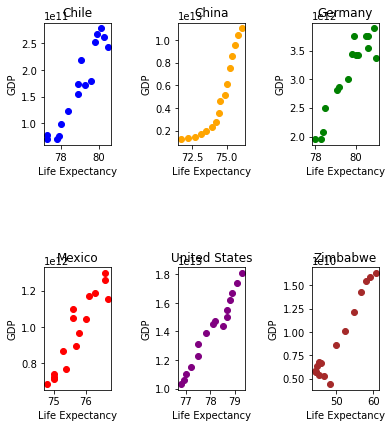

<Figure size 432x288 with 0 Axes>

In [16]:
# Creating a new df for each country
# Chile
Chile_df = df[(df['Country'] == 'Chile')]

# China
China_df = df[(df['Country'] == 'China')]
       
# Germany
Germany_df = df[(df['Country'] == 'Germany')]

# Mexico
Mexico_df = df[(df['Country'] == 'Mexico')]

# United States of America
US_df = df[(df['Country'] == 'United States of America')]

# Zimbabwe
Zimbabwe_df = df[(df['Country'] == 'Zimbabwe')]

# Creating a Scatter plot to visualize the correlation for each country
# Chile 
plt.subplot(2,3,1)
plt.plot(Chile_df['Life expectancy at birth (years)'], Chile_df['GDP'], 'o', color = 'blue')
plt.title('Chile')
plt.xlabel('Life Expectancy')
plt.ylabel('GDP')

# China 
plt.subplot(2,3,2)
plt.plot(China_df['Life expectancy at birth (years)'], China_df['GDP'], 'o', color = 'orange')
plt.title('China')
plt.xlabel('Life Expectancy')
plt.ylabel('GDP')

# Germany
plt.subplot(2,3,3)
plt.plot(Germany_df['Life expectancy at birth (years)'], Germany_df['GDP'], 'o', color = 'green')
plt.title('Germany')
plt.xlabel('Life Expectancy')
plt.ylabel('GDP')

# Mexico 
plt.subplot(2,3,4)
plt.plot(Mexico_df['Life expectancy at birth (years)'], Mexico_df['GDP'], 'o', color = 'red')
plt.title('Mexico')
plt.xlabel('Life Expectancy')
plt.ylabel('GDP')

# US 
plt.subplot(2,3,5)
plt.plot(US_df['Life expectancy at birth (years)'], US_df['GDP'], 'o', color = 'purple')
plt.title('United States')
plt.xlabel('Life Expectancy')
plt.ylabel('GDP')

# Zimbabwe
plt.subplot(2,3,6)
plt.plot(Zimbabwe_df['Life expectancy at birth (years)'], Zimbabwe_df['GDP'], 'o', color = 'brown')
plt.title('Zimbabwe')
plt.xlabel('Life Expectancy')
plt.ylabel('GDP')

plt.subplots_adjust(hspace = 1, wspace = 1, top = 1.4)
plt.show()
plt.clf()


### Conclusion
#### First, it is important to mention that correlation does not necessarily mean causation.
#### Based on the analysis above, we can conclude that GDP and Life Expectancy present a strong positive correlation for the countries shown in the data. As GDP grows, Life Expectancy also increases, and vice versa.
#### It is essential to mention that although each analyzed country has a different social, economic, and geographic reality, the positive correlation is still strong when analyzing it individually by each country.
### Futhers Analyzes Opportunities
#### 1- It can be helpful to analyze a more extensive range of countries to get a deeper understanding of the correlation;
#### 2- It would be great to have data about worldwide events to cross with the GDP and Life Expectancy to understand how they can be affected.